<a href="https://colab.research.google.com/github/AbhijithP96/DeepL_CV/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install torch torchvision

In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
from torch import nn
from torchvision import datasets, transforms

In [3]:
transform = transforms.Compose([transforms.Resize((28,28)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,))])
training_dataset = datasets.MNIST(root ='./data', train=True, download=True, transform=transform)

In [4]:
def im_convert(tensor):
  image = tensor.clone().detach().numpy()
  image = image.transpose(1,2,0)
  image = image * (np.array([0.5,0.5,0.5])) + np.array([0.5,0.5,0.5])
  image = image.clip(0,1)
  return image

In [5]:
training_loader = torch.utils.data.DataLoader(dataset = training_dataset , batch_size = 100 , shuffle = True)

val_dataset = datasets.MNIST(root ='./data', train=False, download=True, transform=transform)
val_loader = torch.utils.data.DataLoader(dataset = val_dataset , batch_size = 100 , shuffle = False)

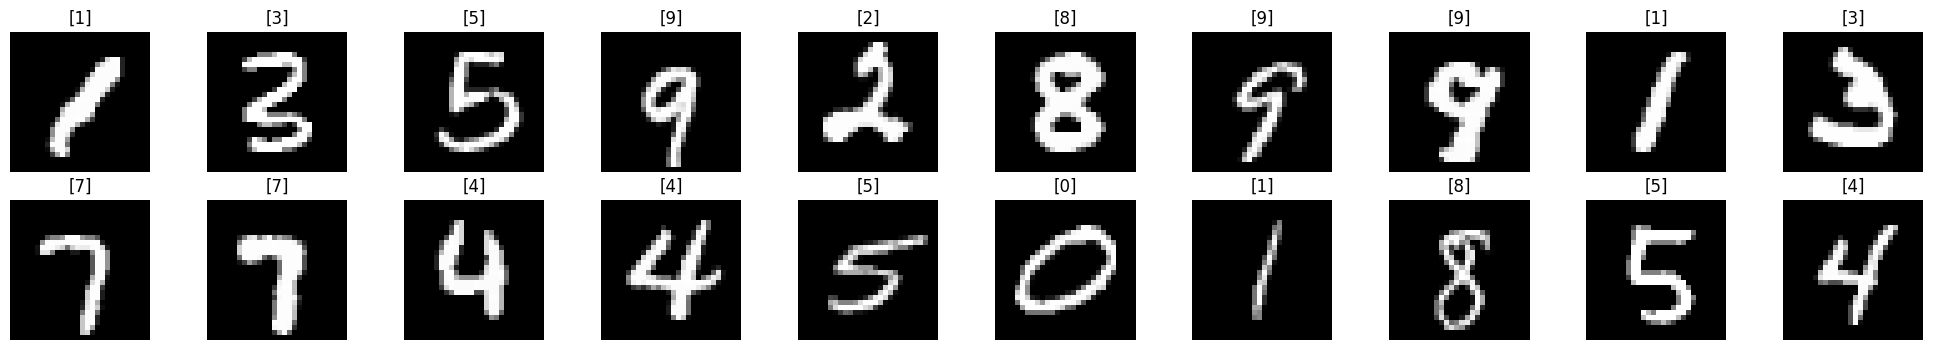

In [18]:
dataiter = iter(training_loader)
images , labels = next(dataiter)
fig = plt.figure(figsize = (25,4))

for i in range(20):
  ax = fig.add_subplot(2,10,i+1)
  plt.imshow(im_convert(images[i]))
  ax.axis('off')
  ax.set_title([labels[i].item()])

In [7]:
class Classifier(nn.Module):
  def __init__(self, D_in , H1 , H2, D_out):
    super().__init__()
    self.linear1 = nn.Linear(D_in,H1)
    self.linear2 = nn.Linear(H1,H2)
    self.linear3 = nn.Linear(H2,D_out)

  def forward(self, x):
    x = F.relu(self.linear1(x))
    x = F.relu(self.linear2(x))
    x = self.linear3(x)
    return x


In [8]:
model = Classifier(28*28,125,65,10)

In [9]:
criterion = nn.CrossEntropyLoss() #includes softmax
optimizer = torch.optim.Adam(model.parameters() , lr = 0.0001)

In [10]:
epochs = 12
losses = []
acc = []

val_losses = []
val_acc = []

for e in range(epochs):
  run_e_loss = 0.0
  run_e_acc = 0.0

  run_v_loss = 0.0
  run_v_acc = 0.0
  for images,labels in training_loader:
    inputs = images.view(images.shape[0],-1)
    outputs = model(inputs)
    loss = criterion(outputs,labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    _,preds = torch.max(outputs,1)
    run_e_loss += loss.item()
    run_e_acc += torch.sum(preds == labels.data)
  else:

    print(f'epoch : {e+1}')
    with torch.no_grad():
      for val_images,val_labels in val_loader:
        val_inputs = val_images.view(val_images.shape[0],-1)
        val_outputs = model(val_inputs)
        val_loss = criterion(val_outputs,val_labels)

        _,val_preds = torch.max(val_outputs,1)
        run_v_loss += val_loss.item()
        run_v_acc += torch.sum(val_preds == val_labels.data)

    epoch_loss = run_e_loss/len(training_loader)
    epoch_acc = run_e_acc.float()/len(training_loader)
    losses.append(epoch_loss)
    acc.append(epoch_acc.item())
    print('training loss / accuracy : {:.4f} / {:.4f}'.format(epoch_loss,epoch_acc.item()))


    val_epoch_loss = run_v_loss/len(val_loader)
    val_epoch_acc = run_v_acc.float()/len(val_loader)
    val_losses.append(val_epoch_loss)
    val_acc.append(val_epoch_acc.item())
    print('validation loss / accuracy : {:.4f} / {:.4f}'.format(val_epoch_loss,val_epoch_acc.item()))

epoch : 1
training loss / accuracy : 0.9226 / 77.1367
validation loss / accuracy : 0.4265 / 88.3900
epoch : 2
training loss / accuracy : 0.3781 / 89.5267
validation loss / accuracy : 0.3180 / 90.8200
epoch : 3
training loss / accuracy : 0.3147 / 90.9683
validation loss / accuracy : 0.2794 / 91.9200
epoch : 4
training loss / accuracy : 0.2764 / 92.0083
validation loss / accuracy : 0.2486 / 92.6900
epoch : 5
training loss / accuracy : 0.2453 / 92.8600
validation loss / accuracy : 0.2302 / 93.3600
epoch : 6
training loss / accuracy : 0.2218 / 93.6700
validation loss / accuracy : 0.2067 / 94.0200
epoch : 7
training loss / accuracy : 0.2011 / 94.2100
validation loss / accuracy : 0.1872 / 94.5700
epoch : 8
training loss / accuracy : 0.1852 / 94.6567
validation loss / accuracy : 0.1725 / 94.9700
epoch : 9
training loss / accuracy : 0.1710 / 95.0533
validation loss / accuracy : 0.1638 / 95.0500
epoch : 10
training loss / accuracy : 0.1587 / 95.3917
validation loss / accuracy : 0.1565 / 95.3300

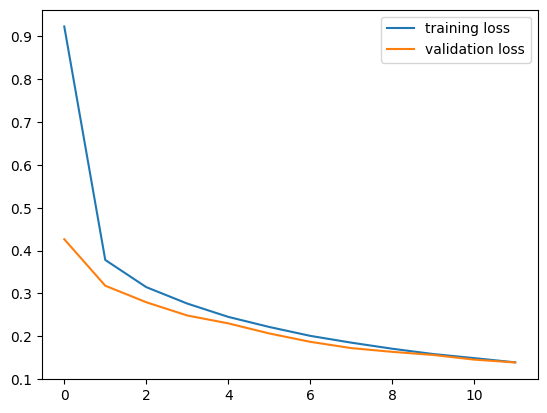

In [11]:
plt.plot(losses,label='training loss')
plt.plot(val_losses,label='validation loss')
plt.legend()

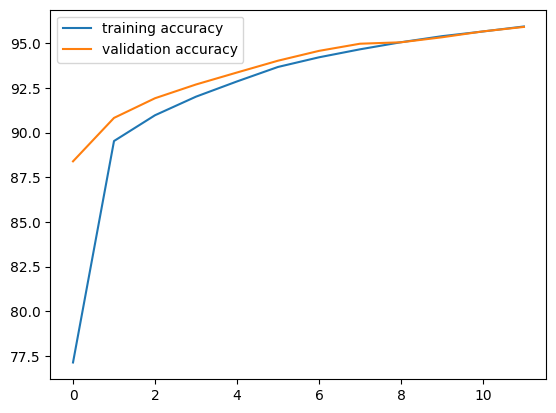

In [12]:
plt.plot(acc,label='training accuracy')
plt.plot(val_acc,label='validation accuracy')
plt.legend()

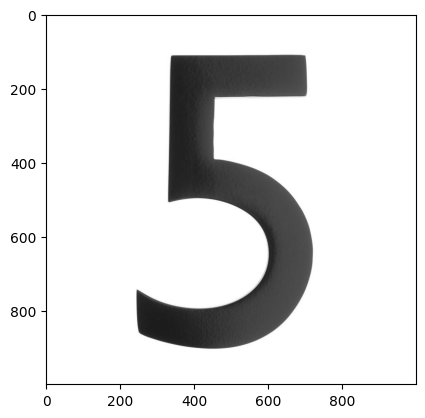

In [13]:
import requests
import PIL
from PIL import Image
from io import BytesIO
url = 'https://images.homedepot-static.com/productImages/007164ea-d47e-4f66-8d8c-fd9f621984a2/svn/architectural-mailboxes-house-letters-numbers-3585b-5-64_1000.jpg'
req = requests.get(url,stream=True)
img = Image.open(BytesIO(req.content))
plt.imshow(img)

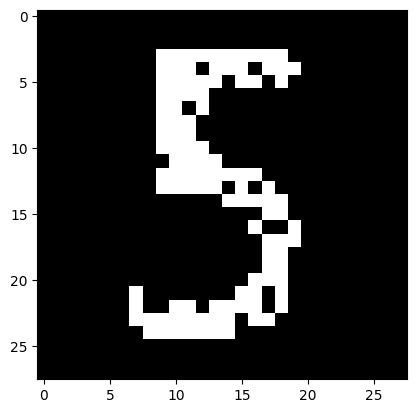

In [14]:
img = PIL.ImageOps.invert(img)
img = img.convert('1')
img = transform(img)
plt.imshow(im_convert(img))

In [19]:
img = img.view(img.shape[0],-1)
output = model(img)
_,pred = torch.max(output,1)
print(pred.item())

5


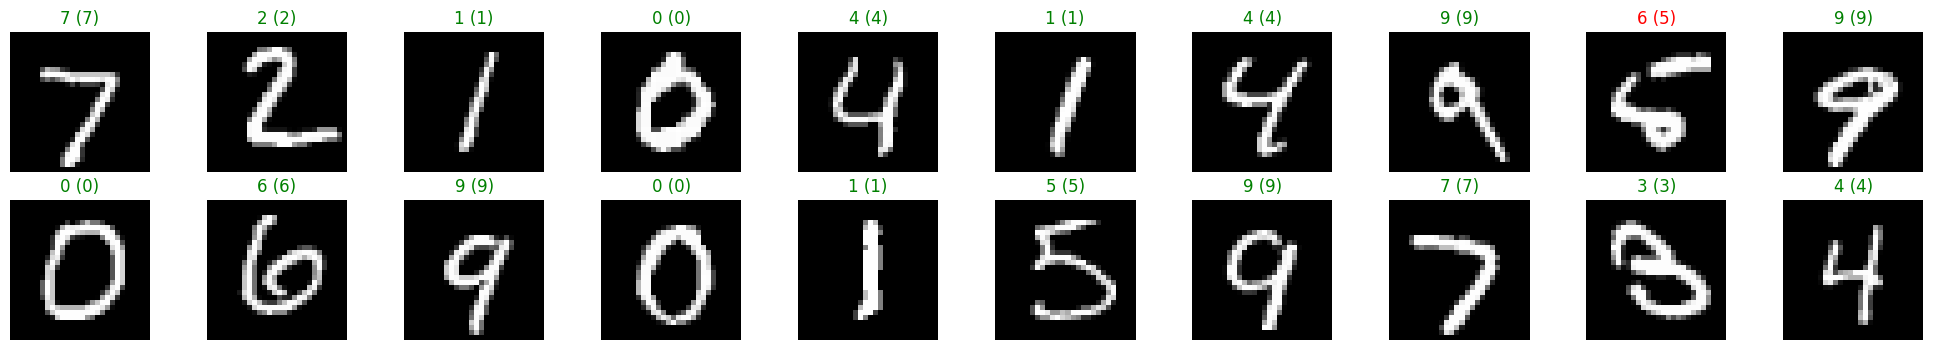

In [24]:
dataiter = iter(val_loader)
images , labels = next(dataiter)
images_ = images.view(images.shape[0],-1)
outputs = model(images_)
_,preds = torch.max(outputs,1)

fig = plt.figure(figsize = (25,4))

for i in range(20):
  ax = fig.add_subplot(2,10,i+1)
  plt.imshow(im_convert(images[i]))
  ax.axis('off')
  ax.set_title('{} ({})'.format(str(preds[i].item()),str(labels[i].item())) , color = ('green' if preds[i]==labels[i] else 'red'))